## Salary Prediction

### EDA

In [ ]:
import pandas as pd 
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings( 'ignore' )
plt.style.use("fivethirtyeight")

In [ ]:
# Using a filtered dataframe to speed up the process
df = pd.read_csv("cagedmov2022-08-07-06.csv")

# Dropping unnecessary column 
df = df.drop(["Unnamed: 0"], axis = 1)

In [ ]:
df.head(3)

,competênciamov,região,uf,município,seção,subclasse,saldomovimentação,cbo2002ocupação,categoria,graudeinstrução,...,indtrabparcial,salário,tamestabjan,indicadoraprendiz,origemdainformação,competênciadec,indicadordeforadoprazo,unidadesaláriocódigo,valorsaláriofixo,Descrição
0,202208,3,35,355030,K,6542100,-1,212405,101,5,...,0,13000.0,9,0,1,202208,0,5,13000.0,Analista de Desenvolvimento de Sistemas
1,202208,3,35,355030,N,8220200,-1,212405,101,4,...,0,11793.0,9,0,1,202208,0,5,11793.0,Analista de Desenvolvimento de Sistemas
2,202208,3,35,355030,J,6201501,1,212405,101,5,...,9,11175.0,9,0,1,202208,0,5,11175.0,Analista de Desenvolvimento de Sistemas


In [ ]:
df.sample(3)

,competênciamov,região,uf,município,seção,subclasse,saldomovimentação,cbo2002ocupação,categoria,graudeinstrução,...,indtrabparcial,salário,tamestabjan,indicadoraprendiz,origemdainformação,competênciadec,indicadordeforadoprazo,unidadesaláriocódigo,valorsaláriofixo,Descrição
10929,202206,3,35,355030,M,7319004,1,212405,101,8,...,0,6000.00,5,0,1,202206,0,5,6000.00,Analista de Desenvolvimento de Sistemas
204,202208,3,35,355030,J,6201501,1,212405,101,5,...,0,11888.43,9,0,1,202208,0,5,11888.43,Analista de Desenvolvimento de Sistemas
18598,202206,3,35,355030,J,6201501,-1,212420,101,5,...,0,2326.20,7,0,1,202206,0,5,2326.20,Analista de Suporte Computacional


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26423 entries, 0 to 26422
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   competênciamov          26423 non-null  int64  
 1   região                  26423 non-null  int64  
 2   uf                      26423 non-null  int64  
 3   município               26423 non-null  int64  
 4   seção                   26423 non-null  object 
 5   subclasse               26423 non-null  int64  
 6   saldomovimentação       26423 non-null  int64  
 7   cbo2002ocupação         26423 non-null  int64  
 8   categoria               26423 non-null  int64  
 9   graudeinstrução         26423 non-null  int64  
 10  idade                   26420 non-null  float64
 11  horascontratuais        26423 non-null  float64
 12  raçacor                 26423 non-null  int64  
 13  sexo                    26423 non-null  int64  
 14  tipoempregador          26423 non-null

In [ ]:
df.shape

(26423, 29)

In [ ]:
(df.isna().sum() / len(df)) * 100

competênciamov            0.000000
região                    0.000000
uf                        0.000000
município                 0.000000
seção                     0.000000
subclasse                 0.000000
saldomovimentação         0.000000
cbo2002ocupação           0.000000
categoria                 0.000000
graudeinstrução           0.000000
idade                     0.011354
horascontratuais          0.000000
raçacor                   0.000000
sexo                      0.000000
tipoempregador            0.000000
tipoestabelecimento       0.000000
tipomovimentação          0.000000
tipodedeficiência         0.000000
indtrabintermitente       0.000000
indtrabparcial            0.000000
salário                   0.000000
tamestabjan               0.000000
indicadoraprendiz         0.000000
origemdainformação        0.000000
competênciadec            0.000000
indicadordeforadoprazo    0.000000
unidadesaláriocódigo      0.000000
valorsaláriofixo          0.000000
Descrição           

In [ ]:
# Dropping all NaN due to the low amount of missing values

df = df.dropna()

In [ ]:
# Checking the frequency

df[["graudeinstrução"]].value_counts(sort = False) 

graudeinstrução
2                    186
3                   3557
4                   4592
5                  14831
6                    417
7                    124
8                   2713
dtype: int64

In [ ]:
pd.DataFrame({'Columns': df.nunique().index , 'Number of unique values':  df.nunique().values})

,Columns,Number of unique values
0,competênciamov,3
1,região,1
2,uf,1
3,município,1
4,seção,19
5,subclasse,460
6,saldomovimentação,2
7,cbo2002ocupação,13
8,categoria,6
9,graudeinstrução,7


In [ ]:
var_quant = [
    "idade", 
    "horascontratuais", 
    "salário", 
    "valorsaláriofixo"]

var_qua = [
    "categoria",
    "cbo2002ocupação",
    "graudeinstrução",
    "raçacor",
    "sexo",
    "tipoempregador",
    "tipoestabelecimento",
    "tipomovimentação",
    "tipodedeficiência",
    "indtrabintermitente",
    "indtrabparcial",
    "tamestabjan",
    "indicadoraprendiz",
    "origemdainformação",
    "unidadesaláriocódigo"
]

var_quali = [
    "região",
    "uf",
    "município",
    "seção",
    "subclasse",
    "categoria",
    "cbo2002ocupação",
    "graudeinstrução",
    "raçacor",
    "sexo",
    "tipoempregador",
    "tipoestabelecimento",
    "tipomovimentação",
    "tipodedeficiência",
    "indtrabintermitente",
    "indtrabparcial",
    "tamestabjan",
    "indicadoraprendiz",
    "origemdainformação",
    "competênciadec",
    "competênciaexc",
    "indicadordeexclusão",
    "indicadordeforadoprazo",
    "unidadesaláriocódigo"
]

label_quali = {
  "sexo": {1: 'M', 3: 'F', 9: 'Não Identificado'},
  "raçacor": {1: 'Branca', 2: 'Preta', 3: 'Parda', 4: 'Amarela', 5: 'Indígena', 6: 'Não informada', 9: 'Não Identificado'},
  "graudeinstrução": {1: "Analfabeto", 2: "Fund & Med Incompleto", 3: "Médio Completo", 4: "Superior Incompleto", 5: "Superior Completo", 6: "Mestrado", 7: "Doutorado", 8: "Pós completa", 99: "Não Identificado"},
  
}

In [ ]:
# Plotting function

def generate_plot(df, row, col):
    plt.figure(figsize=(25,40));
    for i, feat in enumerate(df):
        plt.subplot(row,col, i+1)
        if df[feat].dtypes == 'object':
            sns.countplot(y=df[feat])
            #plt.xticks(rotation=90)
            plt.tight_layout();
        else:
            sns.distplot(x=df[feat], color='c')
            plt.tight_layout();
            plt.xlabel(feat);

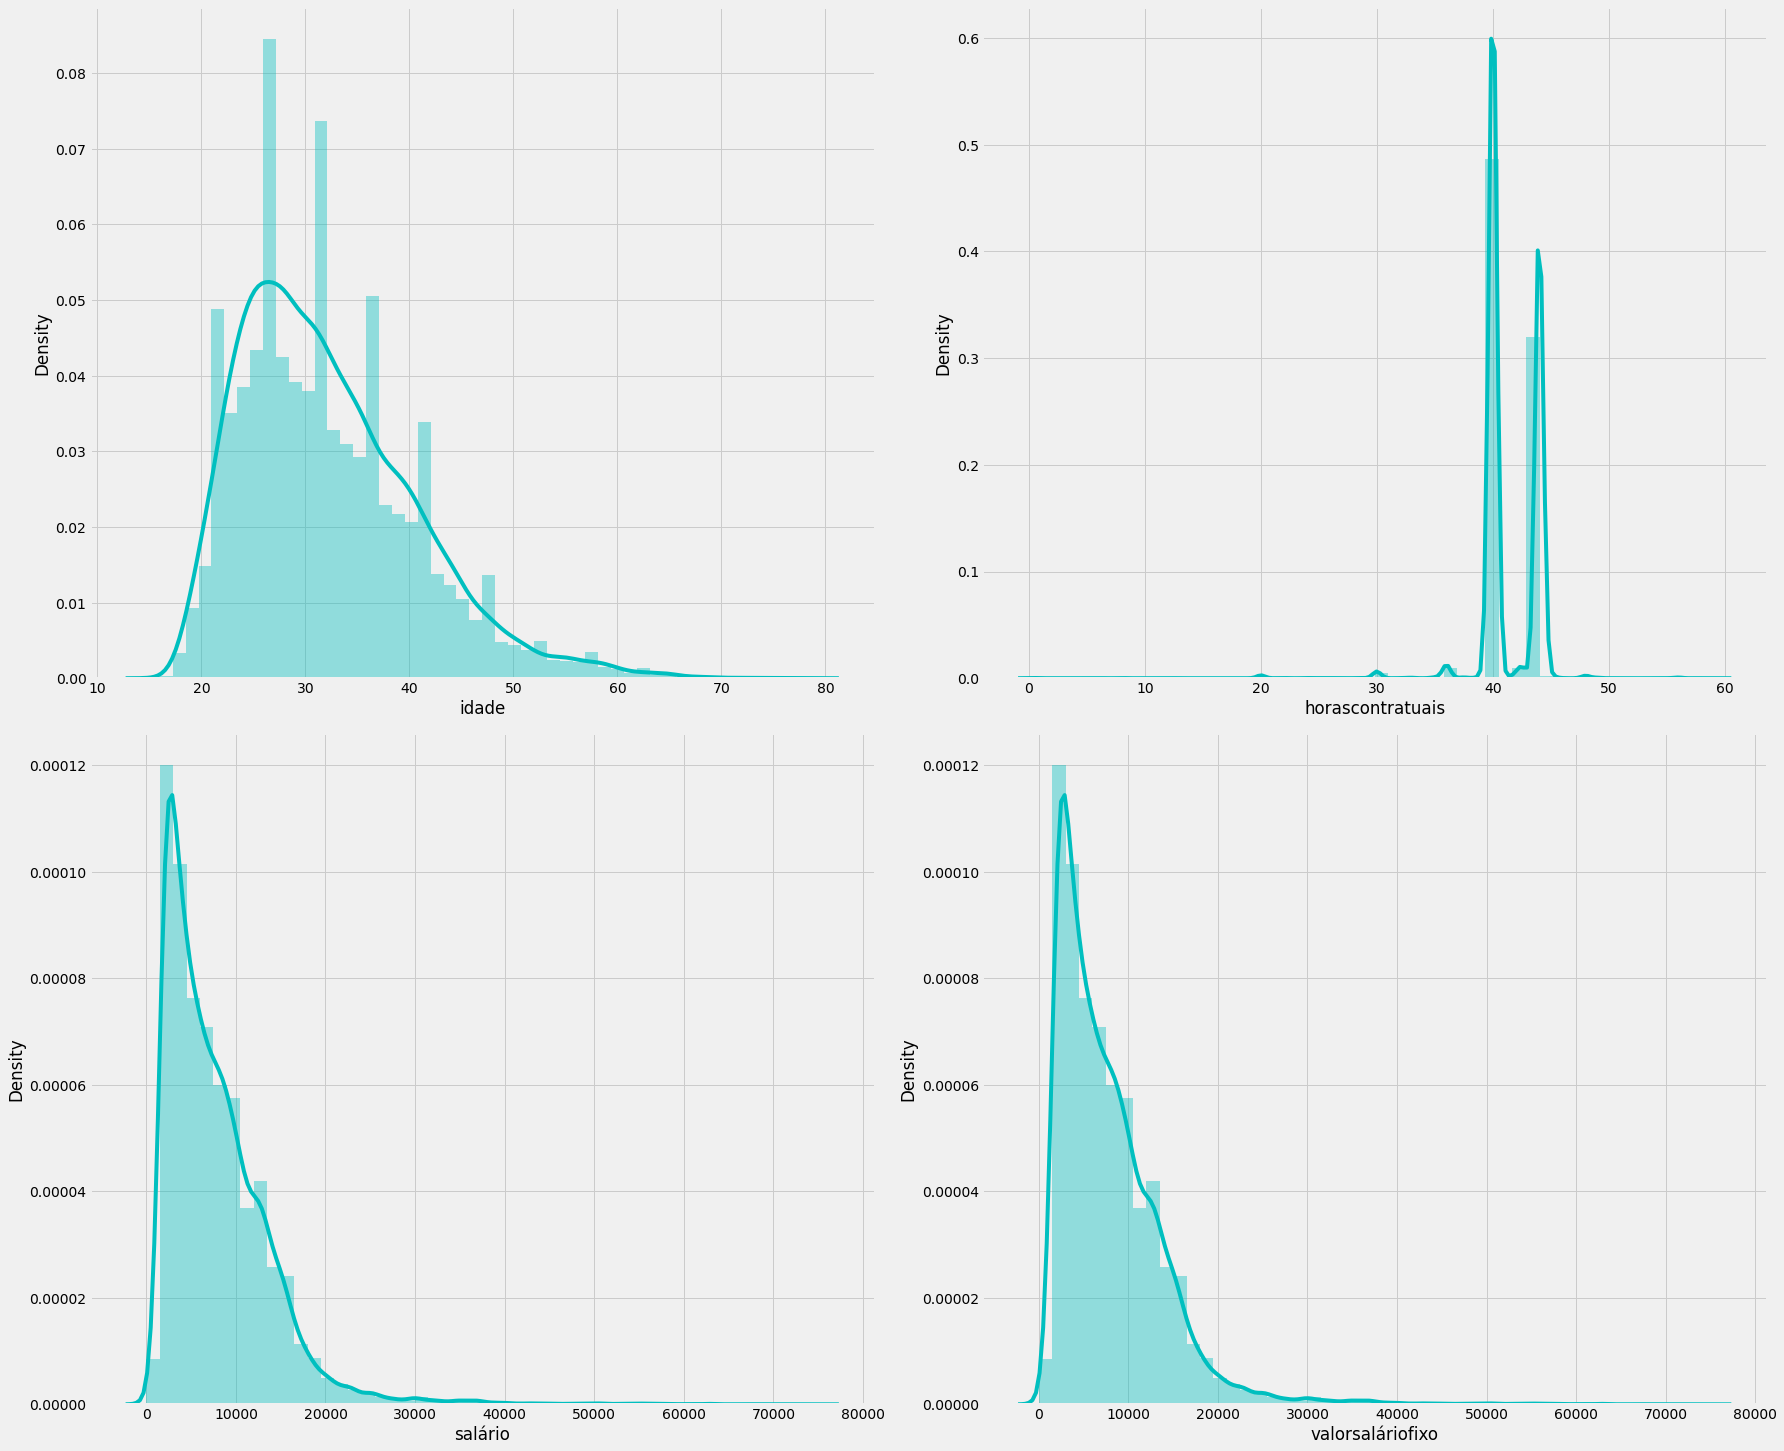

In [ ]:
generate_plot(df[var_quant],4,2)

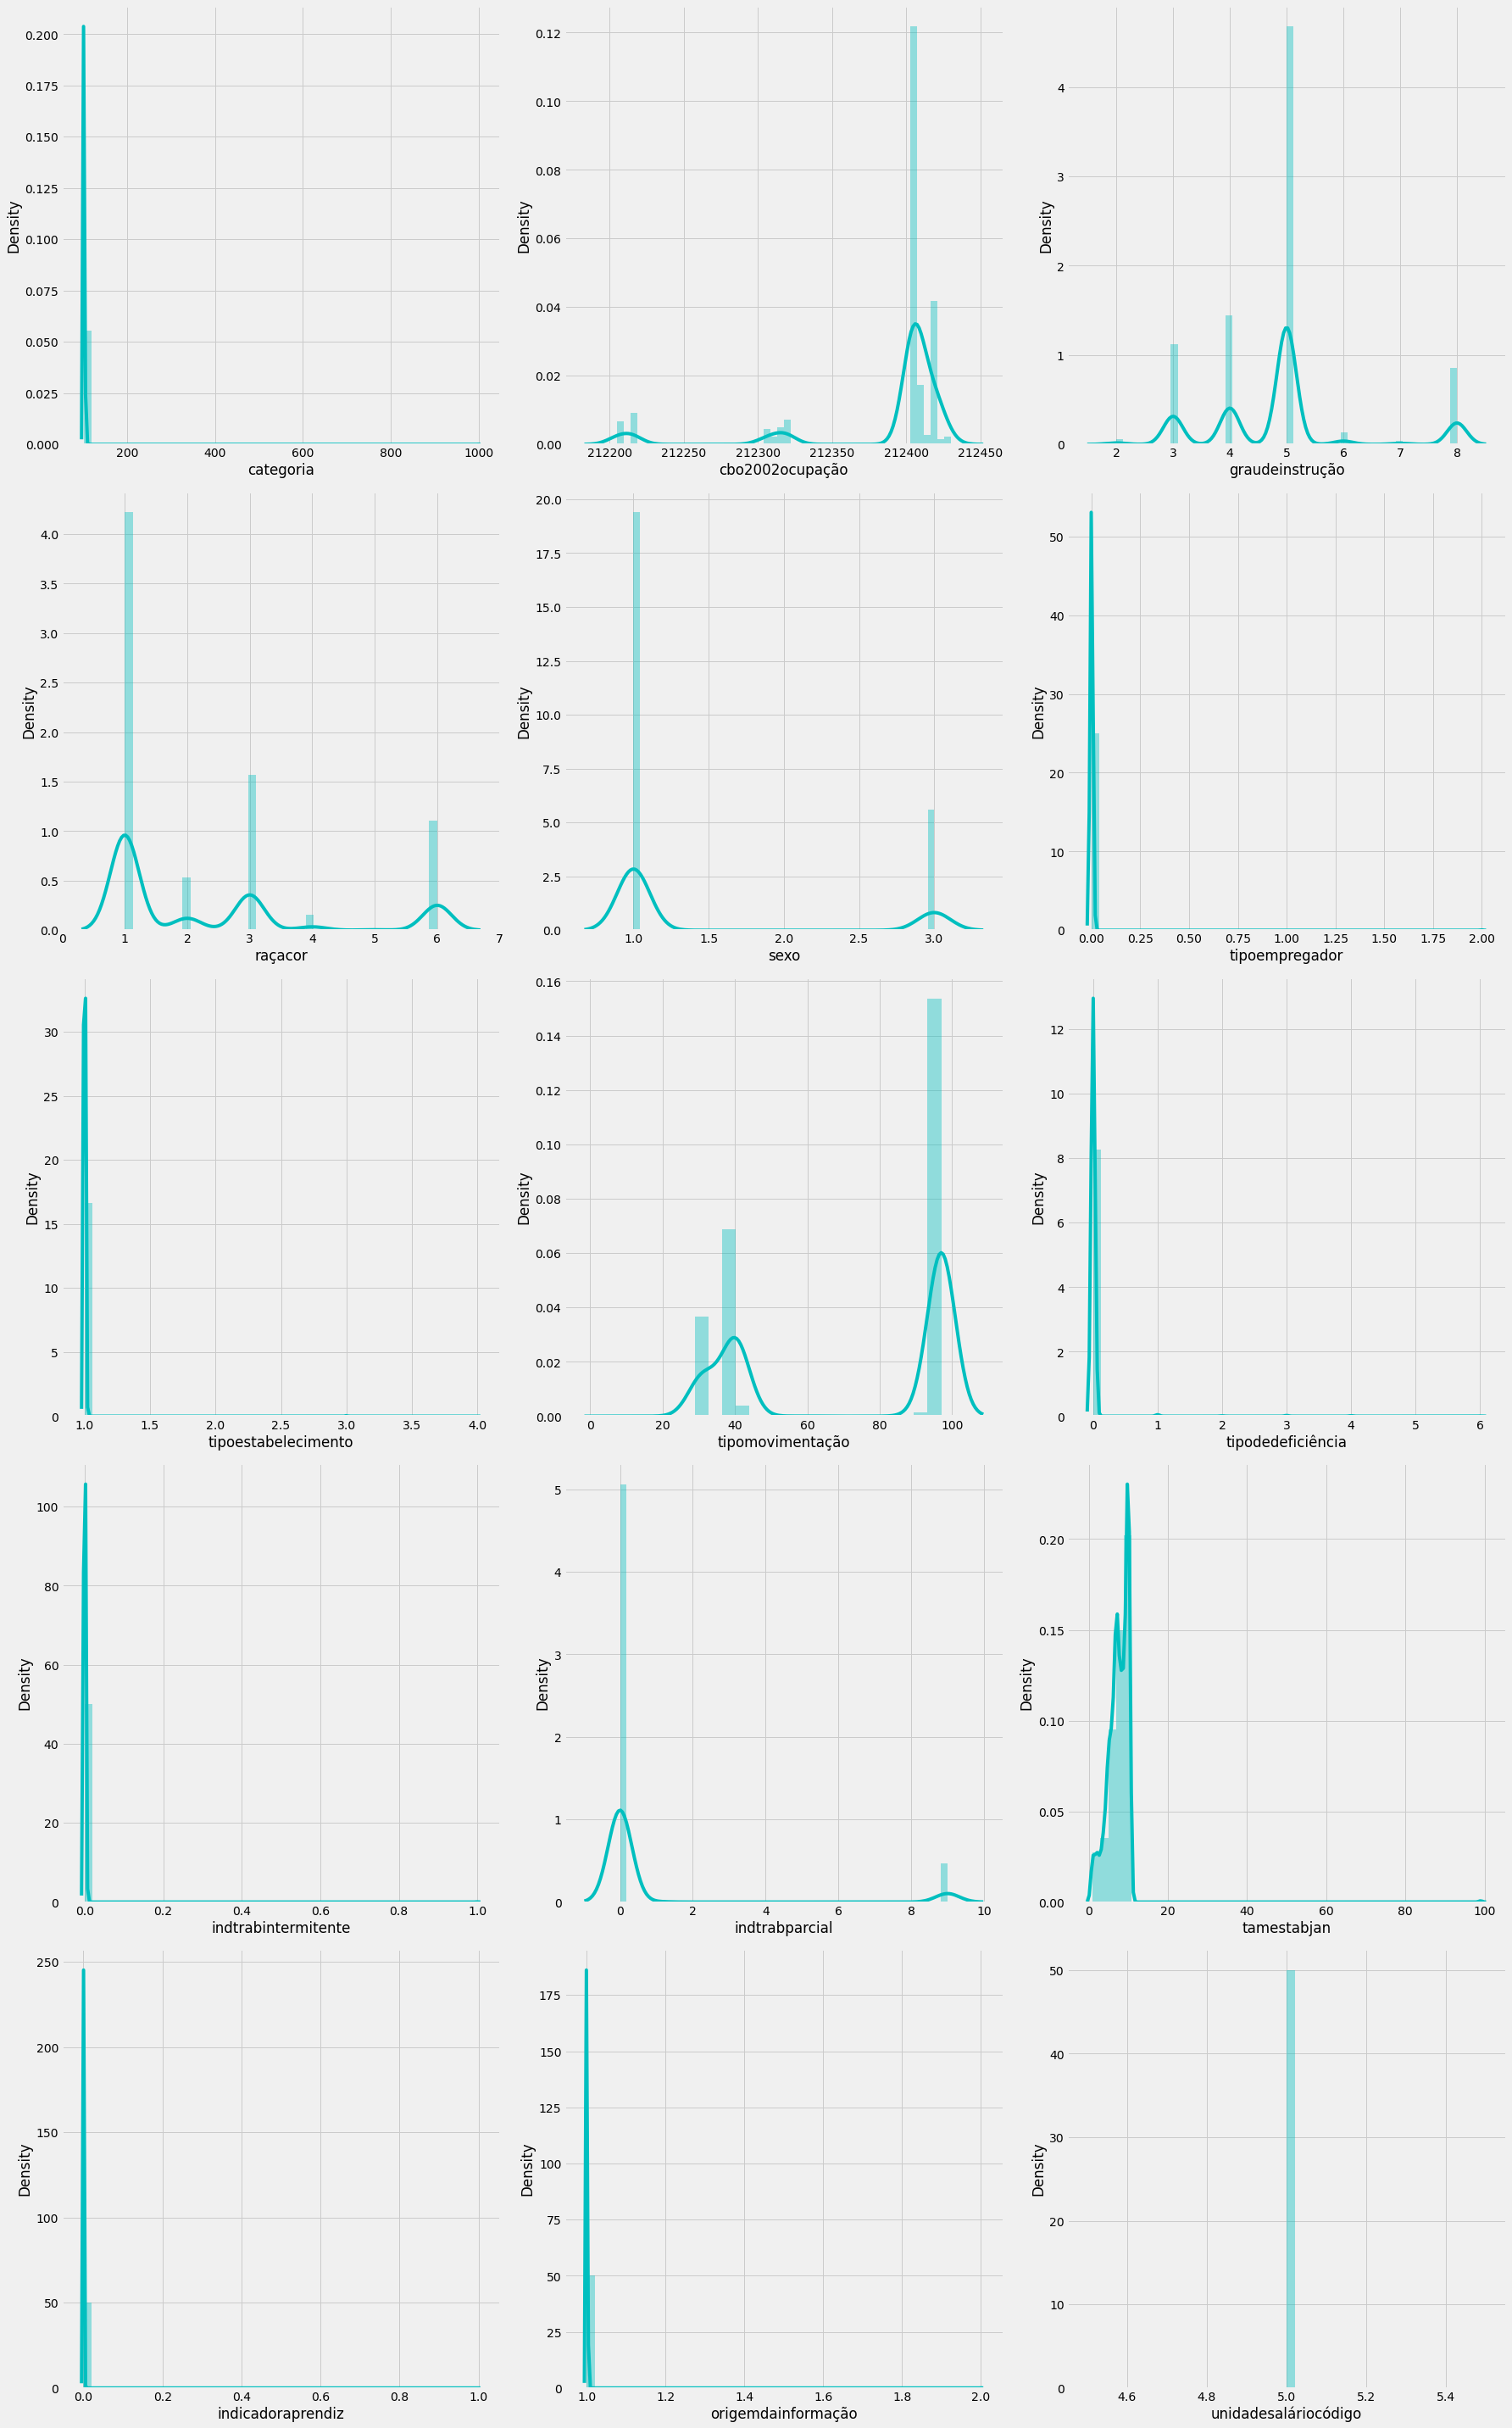

In [ ]:
generate_plot(df[var_qua],5,3)

In [ ]:
df[var_quant].describe(percentiles = [.25, .5, .75, .95, .99]).round(2).T

,count,mean,std,min,25%,50%,75%,95%,99%,max
idade,26420.0,32.08,8.40,16.00,26.0,31.0,37.00,48.0,58.0,78.0
horascontratuais,26420.0,41.40,2.70,0.12,40.0,40.0,44.00,44.0,44.0,59.5
salário,26420.0,7827.02,5898.29,0.00,3500.0,6500.0,10601.25,17600.0,29144.3,75000.0
valorsaláriofixo,26420.0,7827.02,5898.29,0.00,3500.0,6500.0,10601.25,17600.0,29144.3,75000.0


In [ ]:
# Employment category 101 = [CLT] 106 = [Temporary]
df.categoria.value_counts()

101    26015
106      305
105       79
111       11
999        6
103        4
Name: categoria, dtype: int64

In [ ]:
# Putting percentage numbers above chart ( With hue , Without hue)

def percen (plot, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.0f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()

def percen_hue(plot, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.0f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 12)
    plt.show()

In [ ]:
sns.set_palette('viridis')
sns.color_palette('viridis')

[(0.275191, 0.194905, 0.496005),
 (0.212395, 0.359683, 0.55171),
 (0.153364, 0.497, 0.557724),
 (0.122312, 0.633153, 0.530398),
 (0.288921, 0.758394, 0.428426),
 (0.626579, 0.854645, 0.223353)]

In [ ]:
# Boxplot function

def grafico_boxplot(data, variable, label):
    
    if label == "": label = variable
    sns.boxplot(y="valorsaláriofixo", x=variable, data=data, palette='viridis')
    plt.ylabel(label)
    plt.xticks(rotation = 90)
    plt.show()

In [ ]:
# Barplot function

def grafico_barras_prop(data, variable):
    (data[[variable]]
     .value_counts(normalize=True, sort = True)
     .rename("Proportion")
     .reset_index()
     .pipe((sns.barplot, "data"), x=variable, y="Proportion", palette='viridis'))

    plt.ylim(0,1)
    plt.xticks(rotation = 90)
    plt.show()

In [ ]:
px.box(df, x='valorsaláriofixo')

In [ ]:
df.nlargest(n=3, columns=['valorsaláriofixo'])

,competênciamov,região,uf,município,seção,subclasse,saldomovimentação,cbo2002ocupação,categoria,graudeinstrução,...,indtrabparcial,salário,tamestabjan,indicadoraprendiz,origemdainformação,competênciadec,indicadordeforadoprazo,unidadesaláriocódigo,valorsaláriofixo,Descrição
26390,202208,3,35,355030,N,7810800,1,212210,101,5,...,0,75000.00,7,0,1,202208,0,5,75000.00,Engenheiro de Equipamentos em Computacao
23336,202207,3,35,355030,N,7810800,-1,212215,101,5,...,0,73425.04,6,0,1,202207,0,5,73425.04,Engenheiros de Sistemas Operacionais em Comput...
23545,202207,3,35,355030,N,7810800,1,212215,101,5,...,0,68474.00,6,0,1,202207,0,5,68474.00,Engenheiros de Sistemas Operacionais em Comput...


In [ ]:
df.nsmallest(n=3, columns=['valorsaláriofixo'])

,competênciamov,região,uf,município,seção,subclasse,saldomovimentação,cbo2002ocupação,categoria,graudeinstrução,...,indtrabparcial,salário,tamestabjan,indicadoraprendiz,origemdainformação,competênciadec,indicadordeforadoprazo,unidadesaláriocódigo,valorsaláriofixo,Descrição
3620,202208,3,35,355030,J,6201501,1,212405,101,5,...,0,0.0,8,0,1,202208,0,5,0.0,Analista de Desenvolvimento de Sistemas
5951,202207,3,35,355030,J,6209100,1,212405,101,5,...,0,0.0,5,0,1,202207,0,5,0.0,Analista de Desenvolvimento de Sistemas
12003,202206,3,35,355030,N,7911200,1,212405,101,8,...,0,0.0,3,0,1,202206,0,5,0.0,Analista de Desenvolvimento de Sistemas


In [ ]:
df['valorsaláriofixo'].value_counts()[0]

23

Z-Score (also called a standard score) gives you an idea of how far from the mean a data point is. But more technically it’s a measure of how many standard deviations below or above the population mean a raw score is.

In [ ]:
# Interquartile range to detect outliers
def outliers(df, feature):
    Q1= df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 2.7 * IQR
    lower_limit = Q1 - 2.7 * IQR
    return upper_limit, lower_limit
upper, lower = outliers(df, "valorsaláriofixo")
print("Upper limit: ", upper)
print("Lower Limit: ", lower)

Upper limit:  29774.625
Lower Limit:  -15673.375


In [ ]:
# Standard deviation to detect outliers
def outlier_removal(df, variable):
    upper_limit = df[variable].mean() + 3 * df[variable].std()
    lower_limit = df[variable].mean() - 3 * df[variable].std()
    return upper_limit, lower_limit
upper_limit, lower_limit = outlier_removal(df, "valorsaláriofixo")
print("Upper limit: ", upper_limit)
print("Lower Limit: ",lower_limit)

Upper limit:  25521.879322232482
Lower Limit:  -9867.848533436118


In [ ]:
# Filtering salary values >= R$ 1212 Brazilian Minimal Wage & <= upper
df = df[(df.valorsaláriofixo >= 1212) & (df['valorsaláriofixo'] < upper)]
df.head(3)

,competênciamov,região,uf,município,seção,subclasse,saldomovimentação,cbo2002ocupação,categoria,graudeinstrução,...,indtrabparcial,salário,tamestabjan,indicadoraprendiz,origemdainformação,competênciadec,indicadordeforadoprazo,unidadesaláriocódigo,valorsaláriofixo,Descrição
0,202208,3,35,355030,K,6542100,-1,212405,101,5,...,0,13000.0,9,0,1,202208,0,5,13000.0,Analista de Desenvolvimento de Sistemas
1,202208,3,35,355030,N,8220200,-1,212405,101,4,...,0,11793.0,9,0,1,202208,0,5,11793.0,Analista de Desenvolvimento de Sistemas
2,202208,3,35,355030,J,6201501,1,212405,101,5,...,9,11175.0,9,0,1,202208,0,5,11175.0,Analista de Desenvolvimento de Sistemas


In [ ]:
df.to_csv('cagedmov2022-08-07-06-v2.csv')

In [ ]:
df.shape

(26066, 29)

In [ ]:
# Box plot
px.box(df, x='valorsaláriofixo')

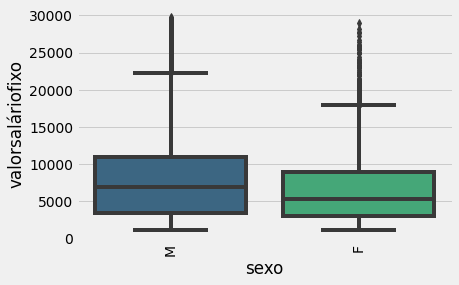

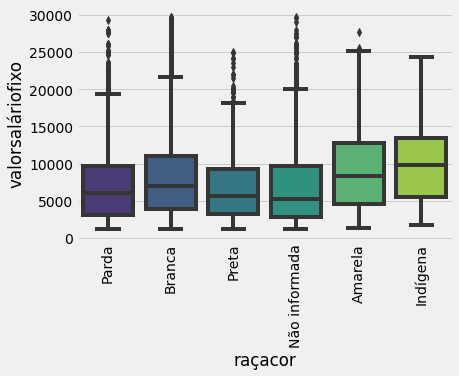

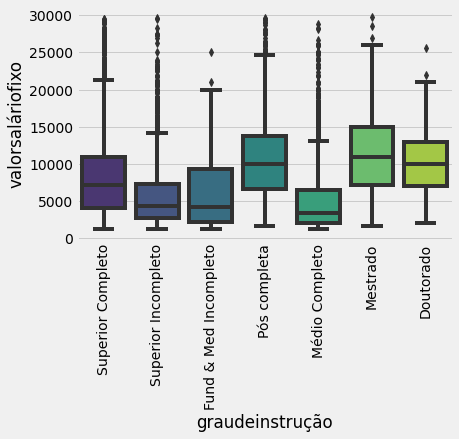

In [ ]:
grafico_boxplot(df.replace(label_quali), "sexo", "valorsaláriofixo")
grafico_boxplot(df.replace(label_quali), "raçacor", "valorsaláriofixo")
grafico_boxplot(df.replace(label_quali), "graudeinstrução", "valorsaláriofixo")

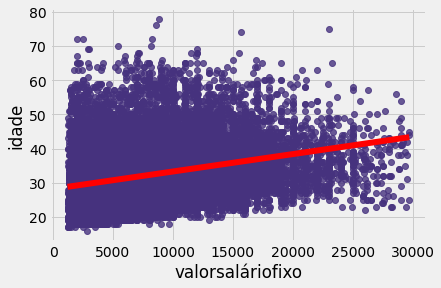

In [ ]:
sns.regplot(x=df.valorsaláriofixo , y=df.idade, line_kws={'color': 'red'})

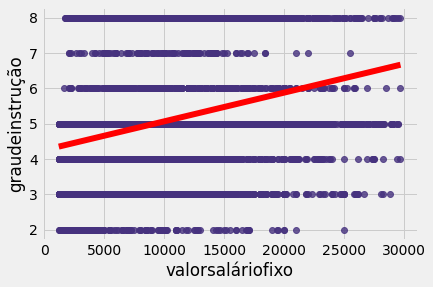

In [ ]:
sns.regplot(x=df.valorsaláriofixo , y=df.graudeinstrução, line_kws={'color': 'red'})

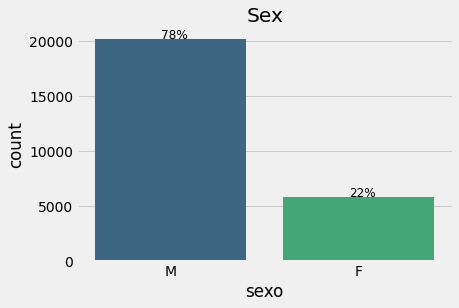

In [ ]:
ax = sns.countplot( x=df.replace(label_quali).sexo , data= df, palette='viridis')
ax.set_title('Sex')
percen(ax , df.sexo)

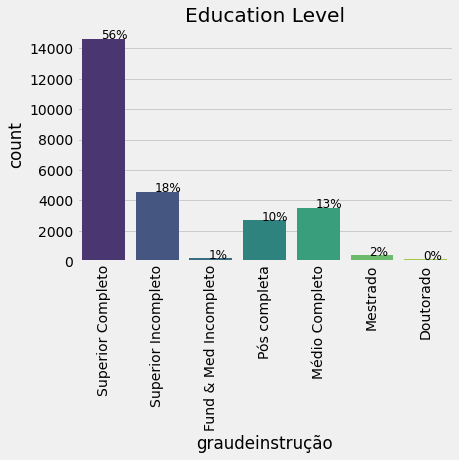

In [ ]:
ax = sns.countplot( x='graudeinstrução' , data= df.replace(label_quali), palette='viridis')
ax.set_title('Education Level')
plt.xticks(rotation = 90)
percen(ax , df.graudeinstrução)

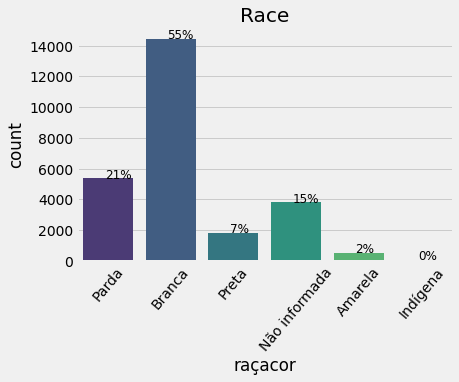

In [ ]:
ax = sns.countplot( x='raçacor' , data= df.replace(label_quali), palette='viridis')
ax.set_title('Race')
plt.xticks(rotation = 50)
percen(ax , df.raçacor)

In [ ]:
df.replace(label_quali).raçacor.value_counts()

Branca           14447
Parda             5389
Não informada     3809
Preta             1820
Amarela            523
Indígena            78
Name: raçacor, dtype: int64

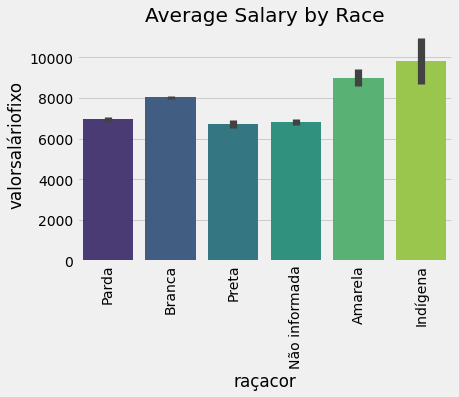

In [ ]:
plt.title('Average Salary by Race')
plt.xticks(rotation = 90)
sns.barplot(data=df.replace(label_quali), x="raçacor", y="valorsaláriofixo", palette='viridis')

Text(0.5, 1.0, 'Salaries ratio for Male/Female')

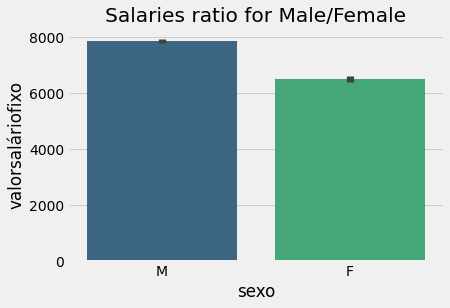

In [ ]:
ax = sns.barplot(data=df.replace(label_quali), x="sexo", y="valorsaláriofixo", palette='viridis')
ax.set_title('Salaries ratio for Male/Female')

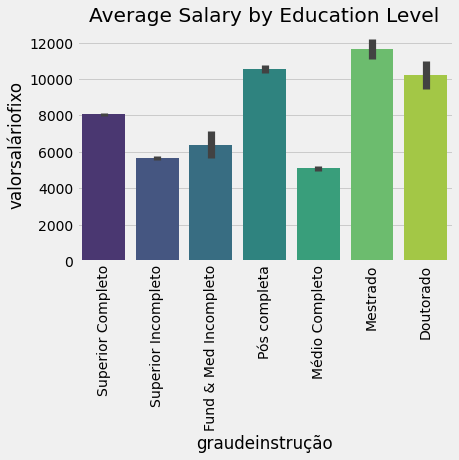

In [ ]:
plt.title('Average Salary by Education Level')
plt.xticks(rotation = 90)
sns.barplot(data=df.replace(label_quali),  x="graudeinstrução", y="valorsaláriofixo", palette='viridis')

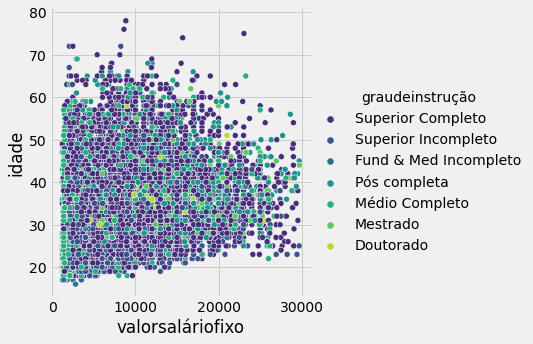

In [ ]:
sns.relplot(data=df.replace(label_quali), x='valorsaláriofixo', y='idade', hue='graudeinstrução', palette='viridis')

In [ ]:
pd.DataFrame({'Education Level': df.replace(label_quali).groupby('graudeinstrução')['valorsaláriofixo'].mean().index , 'Mean salary':  df.groupby('graudeinstrução')['valorsaláriofixo'].mean().round(2).values}).sort_values(by='Mean salary'  , axis=0)[::-1].head(10)

,Education Level,Mean salary
4,Pós completa,11624.20
6,Superior Incompleto,10566.73
5,Superior Completo,10205.93
3,Médio Completo,8063.95
0,Doutorado,6392.43
2,Mestrado,5666.87
1,Fund & Med Incompleto,5100.72


In [ ]:
df.replace(label_quali).graudeinstrução.value_counts(normalize=True).mul(100).round(2).astype(str) + ' %'

Superior Completo         56.1 %
Superior Incompleto       17.5 %
Médio Completo           13.48 %
Pós completa             10.25 %
Mestrado                  1.51 %
Fund & Med Incompleto      0.7 %
Doutorado                 0.45 %
Name: graudeinstrução, dtype: object

In [ ]:
df.replace(label_quali).graudeinstrução.value_counts()

Superior Completo        14623
Superior Incompleto       4562
Médio Completo            3515
Pós completa              2673
Mestrado                   393
Fund & Med Incompleto      182
Doutorado                  118
Name: graudeinstrução, dtype: int64

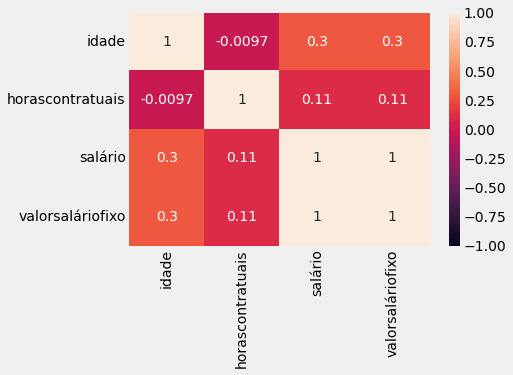

In [ ]:
sns.heatmap(data=df[var_quant].corr(), annot=True, vmin=-1, vmax=1 )

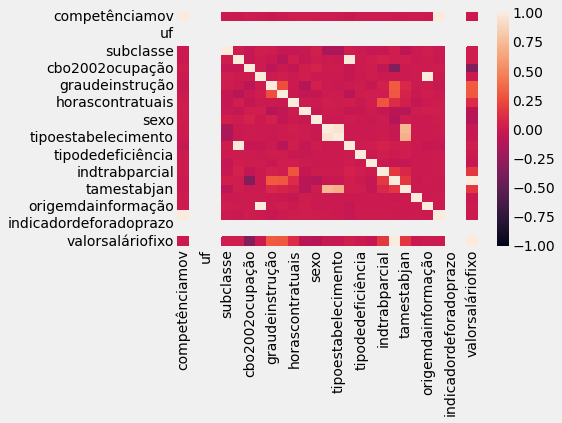

In [ ]:
sns.heatmap(data=df.corr(), vmin=-1, vmax=1 )

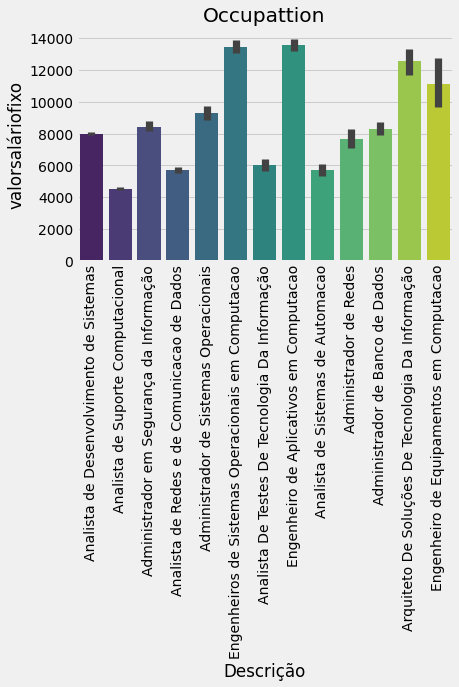

In [ ]:
plt.xticks(rotation = 90)
plt.title('Occupattion')
sns.barplot(data=df.replace(label_quali), x="Descrição", y="valorsaláriofixo", palette='viridis')

In [ ]:
pd.DataFrame({'Occupattion': df.groupby('Descrição')['valorsaláriofixo'].mean().index , 'Mean salary':  df.groupby('Descrição')['valorsaláriofixo'].mean().round(2).values}).sort_values(by='Mean salary'  , axis=0)[::-1]

,Occupattion,Mean salary
10,Engenheiro de Aplicativos em Computacao,13573.14
12,Engenheiros de Sistemas Operacionais em Comput...,13460.69
9,Arquiteto De Soluções De Tecnologia Da Informação,12543.46
11,Engenheiro de Equipamentos em Computacao,11115.79
2,Administrador de Sistemas Operacionais,9294.97
3,Administrador em Segurança da Informação,8440.51
0,Administrador de Banco de Dados,8314.81
5,Analista de Desenvolvimento de Sistemas,7991.10
1,Administrador de Redes,7665.23
4,Analista De Testes De Tecnologia Da Informação,6004.41


In [ ]:
df.Descrição.value_counts(normalize=True).mul(100).round(2).astype(str) + ' %'

Analista de Desenvolvimento de Sistemas               55.39 %
Analista de Suporte Computacional                     18.79 %
Analista de Redes e de Comunicacao de Dados             7.8 %
Engenheiros de Sistemas Operacionais em Computacao     3.64 %
Administrador em Segurança da Informação               3.21 %
Engenheiro de Aplicativos em Computacao                2.85 %
Administrador de Sistemas Operacionais                  2.2 %
Administrador de Banco de Dados                        2.04 %
Analista de Sistemas de Automacao                      1.26 %
Analista De Testes De Tecnologia Da Informação          1.0 %
Administrador de Redes                                 0.98 %
Arquiteto De Soluções De Tecnologia Da Informação      0.65 %
Engenheiro de Equipamentos em Computacao               0.16 %
Name: Descrição, dtype: object

In [ ]:
pd.DataFrame({'Age': df.groupby('idade')['valorsaláriofixo'].mean().index , 'Mean salary':  df.groupby('idade')['valorsaláriofixo'].mean().round(2).values}).sort_values(by='Mean salary'  , axis=0)[::-1]

,Age,Mean salary
57,75.0,23048.59
56,74.0,15681.54
44,60.0,11333.09
52,68.0,10872.46
50,66.0,10797.86
46,62.0,10318.06
32,48.0,10161.34
42,58.0,10124.59
33,49.0,10118.70
38,54.0,10101.06


In [ ]:
pd.DataFrame({'Weekly working hours': df.groupby('horascontratuais')['valorsaláriofixo'].mean().index , 'Mean salary':  df.groupby('horascontratuais')['valorsaláriofixo'].mean().round(2).values}).sort_values(by='Mean salary'  , axis=0)[::-1]

,Weekly working hours,Mean salary
28,35.20,21532.80
79,48.00,16784.99
75,44.92,14000.00
47,41.00,11563.01
45,40.80,11413.34
...,...,...
9,17.60,1750.00
19,28.75,1403.40
18,28.33,1351.00
65,43.67,1252.00


In [ ]:
df.dtypes

competênciamov              int64
região                      int64
uf                          int64
município                   int64
seção                      object
subclasse                   int64
saldomovimentação           int64
cbo2002ocupação             int64
categoria                   int64
graudeinstrução             int64
idade                     float64
horascontratuais          float64
raçacor                     int64
sexo                        int64
tipoempregador              int64
tipoestabelecimento         int64
tipomovimentação            int64
tipodedeficiência           int64
indtrabintermitente         int64
indtrabparcial              int64
salário                   float64
tamestabjan                 int64
indicadoraprendiz           int64
origemdainformação          int64
competênciadec              int64
indicadordeforadoprazo      int64
unidadesaláriocódigo        int64
valorsaláriofixo          float64
Descrição                  object
dtype: object

### Modeling

In [ ]:
df.select_dtypes(include=['int64', 'float64']).corr().style.background_gradient(cmap='coolwarm', vmin=-1, vmax=1)

,competênciamov,região,uf,município,subclasse,saldomovimentação,cbo2002ocupação,categoria,graudeinstrução,idade,horascontratuais,raçacor,sexo,tipoempregador,tipoestabelecimento,tipomovimentação,tipodedeficiência,indtrabintermitente,indtrabparcial,salário,tamestabjan,indicadoraprendiz,origemdainformação,competênciadec,indicadordeforadoprazo,unidadesaláriocódigo,valorsaláriofixo
competênciamov,1.000000,nan,nan,nan,-0.005320,-0.012703,0.012821,-0.006157,-0.020413,-0.001238,0.011840,0.017955,0.008341,0.001785,-0.000662,-0.016212,0.000326,0.000090,0.004254,-0.004012,-0.006511,0.000027,-0.006145,1.000000,nan,nan,-0.004012
região,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
uf,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
município,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
subclasse,-0.005320,nan,nan,nan,1.000000,0.011236,-0.035673,0.026419,0.011891,-0.025570,-0.025733,-0.019471,0.036820,-0.151864,-0.148214,0.008816,-0.003766,-0.031777,-0.016643,0.026940,-0.069151,-0.001627,0.021782,-0.005320,nan,nan,0.026940
saldomovimentação,-0.012703,nan,nan,nan,0.011236,1.000000,-0.023876,0.002361,-0.010312,-0.087511,0.027273,-0.028210,0.014492,-0.005956,-0.007924,0.987030,0.004510,0.017495,0.051334,0.022504,0.027362,-0.007275,0.002673,-0.012703,nan,nan,0.022504
cbo2002ocupação,0.012821,nan,nan,nan,-0.035673,-0.023876,1.000000,0.005879,-0.074788,-0.010556,-0.042428,0.025331,0.055562,0.000993,0.001893,-0.027080,0.005959,0.008235,-0.051701,-0.340774,-0.005202,0.003616,0.004925,0.012821,nan,nan,-0.340774
categoria,-0.006157,nan,nan,nan,0.026419,0.002361,0.005879,1.000000,0.000567,0.028838,-0.003969,0.024205,-0.000724,-0.000586,-0.000597,-0.024112,-0.001536,0.014644,-0.006140,-0.001829,-0.003282,0.000781,0.998984,-0.006157,nan,nan,-0.001829
graudeinstrução,-0.020413,nan,nan,nan,0.011891,-0.010312,-0.074788,0.000567,1.000000,0.262576,-0.003386,-0.102799,0.039265,-0.007421,-0.008328,-0.006305,0.009347,-0.020718,0.044025,0.310005,0.084587,-0.004096,0.001551,-0.020413,nan,nan,0.310005
idade,-0.001238,nan,nan,nan,-0.025570,-0.087511,-0.010556,0.028838,0.262576,1.000000,-0.009704,-0.051597,-0.044884,0.002379,0.000181,-0.092600,0.010421,0.017437,0.022607,0.303038,0.056607,-0.009636,0.027914,-0.001238,nan,nan,0.303038


In [ ]:
import statsmodels.formula.api as smf

modelo_ls1 = smf.ols(formula = 'valorsaláriofixo ~ subclasse + cbo2002ocupação + categoria + graudeinstrução + idade + horascontratuais + raçacor + sexo + tipoempregador + tipoestabelecimento + tipomovimentação + tipodedeficiência + indtrabintermitente + indtrabparcial + tamestabjan + indicadoraprendiz + indicadordeforadoprazo + unidadesaláriocódigo', data=df).fit()
modelo_ls1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       valorsaláriofixo   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.325
Method:                 Least Squares   F-statistic:                     786.5
Date:                Mon, 28 Nov 2022   Prob (F-statistic):               0.00
Time:                        19:34:32   Log-Likelihood:            -2.5384e+05
No. Observations:               26066   AIC:                         5.077e+05
Df Residuals:                   26049   BIC:                         5.078e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               2.288e+05   3827.643     59.765      0.000    2.21e+05    2.36e+05
subclasse               4.207e-05   2.29e-05      1.841      0.066   -2.72e-06    8.69e-05
cbo2002ocupação          -28.0446      0.468    -59.870      0.000     -28.963     -27.126
categoria                 -1.5586      1.867     -0.835      0.404      -5.218       2.100
graudeinstrução          758.6132     20.401     37.184      0.000     718.625     798.601
idade                    135.5816      3.167     42.804      0.000     129.373     141.790
horascontratuais         122.2293     10.043     12.171      0.000     102.545     141.913
raçacor                  -34.7166     14.615     -2.375      0.018     -63.362      -6.071
sexo                    -602.0090     30.609    -19.668      0.000    -662.004    -542.014
tipoempregador         -2.163e+04   1531.459    -14.122      0.000   -2.46e+04   -1.86e+04
tipoestabelecimento      361.6777   1369.721      0.264      0.792   -2323.050    3046.406
tipomovimentação           4.4529      0.865      5.148      0.000       2.757       6.148
tipodedeficiência       -323.9738    108.141     -2.996      0.003    -535.937    -112.011
indtrabintermitente    -3214.8525   1241.217     -2.590      0.010   -5647.706    -782.000
indtrabparcial           187.2906     10.704     17.497      0.000     166.310     208.272
tamestabjan              420.9712     10.893     38.645      0.000     399.620     442.323
indicadoraprendiz      -1307.3734   4105.804     -0.318      0.750   -9354.976    6740.229
indicadordeforadoprazo          0          0        nan        nan           0           0
unidadesaláriocódigo    1.144e+06   1.91e+04     59.765      0.000    1.11e+06    1.18e+06
==============================================================================
Omnibus:                     4097.680   Durbin-Watson:                   1.889
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7747.181
Skew:                           0.988   Prob(JB):                         0.00
Kurtosis:                       4.797   Cond. No.                          inf
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
modelo_ls1 = smf.ols(formula = 'valorsaláriofixo ~ cbo2002ocupação + graudeinstrução + idade + horascontratuais + raçacor + sexo + tipoempregador + tipoestabelecimento + tipodedeficiência + indtrabparcial + tamestabjan + indicadoraprendiz', data=df).fit()
modelo_ls1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       valorsaláriofixo   R-squared:                       0.325
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     1044.
Date:                Mon, 28 Nov 2022   Prob (F-statistic):               0.00
Time:                        19:34:32   Log-Likelihood:            -2.5385e+05
No. Observations:               26066   AIC:                         5.077e+05
Df Residuals:                   26053   BIC:                         5.078e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             5.97e+06   9.95e+04     60.022      0.000    5.78e+06    6.17e+06
cbo2002ocupação       -28.1479      0.468    -60.117      0.000     -29.066     -27.230
graudeinstrução       760.6841     20.410     37.271      0.000     720.680     800.688
idade                 133.5352      3.151     42.383      0.000     127.360     139.711
horascontratuais      121.9166     10.044     12.138      0.000     102.230     141.603
raçacor               -36.7073     14.615     -2.512      0.012     -65.354      -8.061
sexo                 -598.4859     30.610    -19.552      0.000    -658.483    -538.489
tipoempregador      -2.193e+04   1529.929    -14.336      0.000   -2.49e+04   -1.89e+04
tipoestabelecimento   287.2704   1370.458      0.210      0.834   -2398.903    2973.444
tipodedeficiência    -322.5563    108.208     -2.981      0.003    -534.649    -110.463
indtrabparcial        189.2432     10.701     17.685      0.000     168.269     210.217
tamestabjan           426.3009     10.852     39.282      0.000     405.030     447.572
indicadoraprendiz   -1476.8453   4108.312     -0.359      0.719   -9529.362    6575.671
==============================================================================
Omnibus:                     4120.807   Durbin-Watson:                   1.888
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7822.983
Skew:                           0.991   Prob(JB):                         0.00
Kurtosis:                       4.810   Cond. No.                     8.31e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.31e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

####  Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Converting target variable to int

df['valorsaláriofixo'] = df['valorsaláriofixo'].astype(int)

In [ ]:
features = ['cbo2002ocupação','graudeinstrução','idade','horascontratuais','raçacor','sexo','tipoempregador','tipoestabelecimento',
            'tipodedeficiência','indtrabparcial','tamestabjan','indicadoraprendiz']
X = df.loc[:, features]
y = df.loc[:, ['valorsaláriofixo']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=45, train_size = .80)

In [ ]:
X_train.shape, X_test.shape

((20852, 12), (5214, 12))

In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [ ]:
lm.fit(X_train, y_train)

LinearRegression()

In [ ]:
cdf = pd.DataFrame(lm.coef_[0], index=X_train.columns, columns=['coefficients'])
cdf

,coefficients
cbo2002ocupação,-27.859144
graudeinstrução,774.107221
idade,131.884604
horascontratuais,133.021132
raçacor,-23.465813
sexo,-603.214658
tipoempregador,-22314.133786
tipoestabelecimento,356.562162
tipodedeficiência,-317.315486
indtrabparcial,199.876731


In [ ]:
y_predicted = lm.predict(X_test)
len(y_predicted)

5214

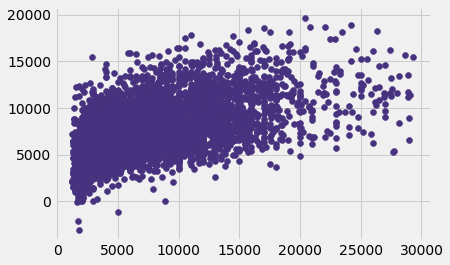

In [ ]:
plt.scatter(y_test, y_predicted)

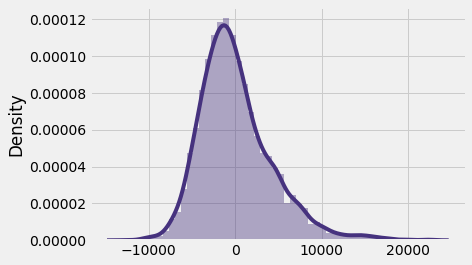

In [ ]:
sns.distplot((y_test - y_predicted))

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test, y_predicted)

3174.5611902652117

In [ ]:
import numpy
numpy.sqrt(metrics.mean_squared_error(y_test, y_predicted))

4196.830506573958

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [ ]:
rfc=RandomForestClassifier(random_state=42)

In [ ]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [ ]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

In [ ]:
CV_rfc.best_params_

In [ ]:
rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 500, max_depth=8, criterion='gini')

In [ ]:
rfc1.fit(X_train, y_train)

In [ ]:
pred=rfc1.predict(X_test)

In [ ]:
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,pred))

In [ ]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=8, random_state=0)


# Fit the model
clf_gini.fit(X_train, y_train)

In [ ]:
#Compare the train-set and test-set accuracy

y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

In [ ]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train)) 